In [1]:
import pandas as pd
from IPython.display import Image
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import warnings 
warnings.filterwarnings('ignore')
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from IPython.display import display
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_excel(r"C:\Users\hp\Downloads\Data- acquisition scorecard.xlsx", sheet_name = 'Data')
print(df.shape)
df.head()

(3980, 35)


,ID,Age,Customer_type,Gross_income,Net_income,SEX,Type_of_industry,Marital_Status,Months_in_city,Months_in_current_job,...,ACCOUNT_12,ACCOUNT_13,ACCOUNT_14,ACCOUNT_15,ACCOUNT_16,ACCOUNT_17,ACCOUNT_18,ACCOUNT_19,ACCOUNT_20,ACCOUNT_21
0,1794,40.000,SALARIED,70891.000,62491.000,MALE,OTHERS,MARRIED,229.000,108,...,9,0,8,2,0,2,275606,0,275606,5311
1,3183,35.000,SALARIED,53617.000,53617.000,MALE,OTHERS,MARRIED,408.000,60,...,8,0,6,1,0,0,4844,4824,20,5289
2,1841,46.000,SALARIED,20000.000,45912.000,MALE,OTHERS,MARRIED,552.000,204,...,4,2,1,1,1,0,15695,15695,0,5153
3,1115,49.000,SALARIED,40000.000,77440.000,FEMALE,OTHERS,MARRIED,0.000,0,...,1,1,0,1,1,0,480051,480051,0,5143
4,3125,45.000,SELF EMPLOYED,36526.000,36526.000,MALE,OTHERS,MARRIED,540.000,22,...,2,0,0,1,0,0,2781,2781,0,5093


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3980 entries, 0 to 3979
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     3980 non-null   int64  
 1   Age                    3979 non-null   float64
 2   Customer_type          3980 non-null   object 
 3   Gross_income           3980 non-null   float64
 4   Net_income             3980 non-null   float64
 5   SEX                    3976 non-null   object 
 6   Type_of_industry       3975 non-null   object 
 7   Marital_Status         3976 non-null   object 
 8   Months_in_city         3976 non-null   float64
 9   Months_in_current_job  3980 non-null   int64  
 10  Org_Type               3980 non-null   object 
 11  Bank_balance           3344 non-null   float64
 12  Debt_ratio             3980 non-null   float64
 13  Target                 3980 non-null   int64  
 14  ENQ_1                  3980 non-null   int64  
 15  ENQ_

In [4]:
new_cols = ['day_last_enq',"days_hl_last_enq","no_enq_l3","no_hl_enq_l3",'no_enq_l12',
 "no_hl_enq_l12",'no_enq',"no_hl_enq",'no_def_l3','no_def_l12',"days_last_acc_open",
 "no_acc_lc",'no_hl_ac_lc',"no_unsc_acc_lc","no_live_acc","no_live_hl_acc",'no_live_unsc_acc',"os_amt",
'sec_os_amt',"unsec_os_amt","avg_debt_days"]
df.columns = df.columns.str.lower()[:14].tolist()+ new_cols

## Data Pre-Processing

Check for Duplicates :
* at Columns level
* at ID level

In [5]:
print(df.duplicated(subset="id",keep=False).any()) 
print(df.shape)
df.drop_duplicates(subset="id",inplace=True)
print("After dropping duplicates:",df.shape)
print(df.duplicated().any())

True
(3980, 35)
After dropping duplicates: (3894, 35)
False


Data - types for all variables

In [6]:
df.dtypes

id                         int64
age                      float64
customer_type             object
gross_income             float64
net_income               float64
sex                       object
type_of_industry          object
marital_status            object
months_in_city           float64
months_in_current_job      int64
org_type                  object
bank_balance             float64
debt_ratio               float64
target                     int64
day_last_enq               int64
days_hl_last_enq           int64
no_enq_l3                  int64
no_hl_enq_l3               int64
no_enq_l12                 int64
no_hl_enq_l12              int64
no_enq                     int64
no_hl_enq                  int64
no_def_l3                  int64
no_def_l12                 int64
days_last_acc_open         int64
no_acc_lc                  int64
no_hl_ac_lc                int64
no_unsc_acc_lc             int64
no_live_acc                int64
no_live_hl_acc             int64
no_live_un

Check for Missing values 

In [7]:
df.isnull().sum().to_frame() \
                .rename(columns={0:"Missing_values"})\
                .assign(MissingPct = lambda x:(x['Missing_values']/df.shape[0])*100)\
                .sort_values(by="MissingPct",ascending = False)

,Missing_values,MissingPct
bank_balance,626,16.076
type_of_industry,5,0.128
sex,4,0.103
marital_status,4,0.103
months_in_city,4,0.103
age,1,0.026
id,0,0.000
no_unsc_acc_lc,0,0.000
no_def_l12,0,0.000
days_last_acc_open,0,0.000


Univariate distribution for Numeric variables & frequency distribution for Categorical variables

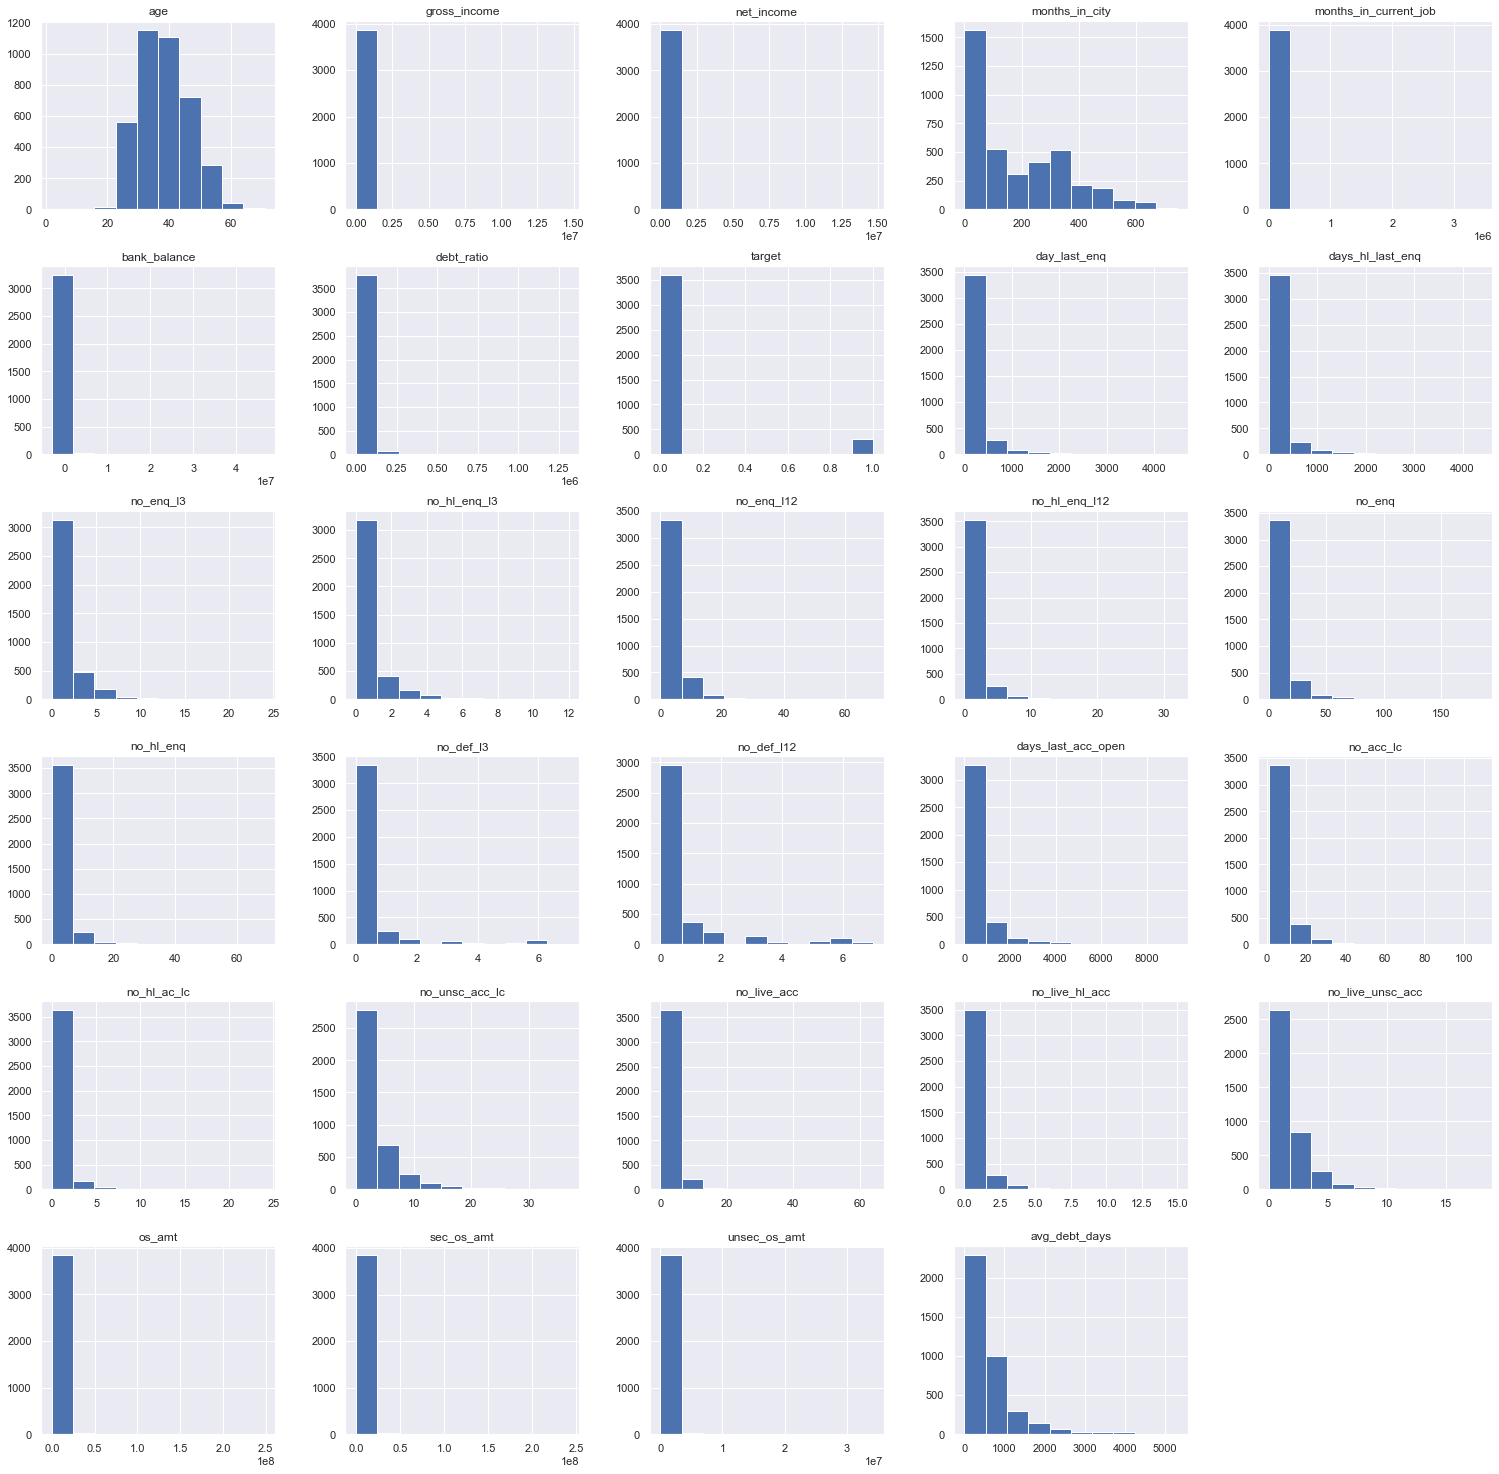

In [8]:
df.hist(column=df.columns.tolist()[1:],figsize=(26,26));

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3894.000,1947.544,1124.319,1.000,974.250,1947.500,2920.750,3895.000
age,3893.000,38.371,8.392,2.000,32.000,38.000,44.000,71.000
gross_income,3894.000,88302.150,454203.463,0.000,20833.330,33241.835,51789.500,14662479.580
net_income,3894.000,80430.321,424645.587,0.000,23800.000,35414.000,54686.063,14662479.583
months_in_city,3890.000,174.733,172.492,0.000,0.000,120.000,300.000,744.000
months_in_current_job,3894.000,1050.641,55293.137,0.000,4.000,48.000,120.000,3441168.000
bank_balance,3268.000,143444.793,1143340.982,-2965788.000,9428.250,25327.000,72041.500,46674874.000
debt_ratio,3894.000,8757.703,57628.628,0.000,0.300,0.460,0.580,1311486.000
target,3894.000,0.077,0.266,0.000,0.000,0.000,0.000,1.000
day_last_enq,3894.000,184.356,397.950,0.000,9.000,38.000,156.000,4492.000


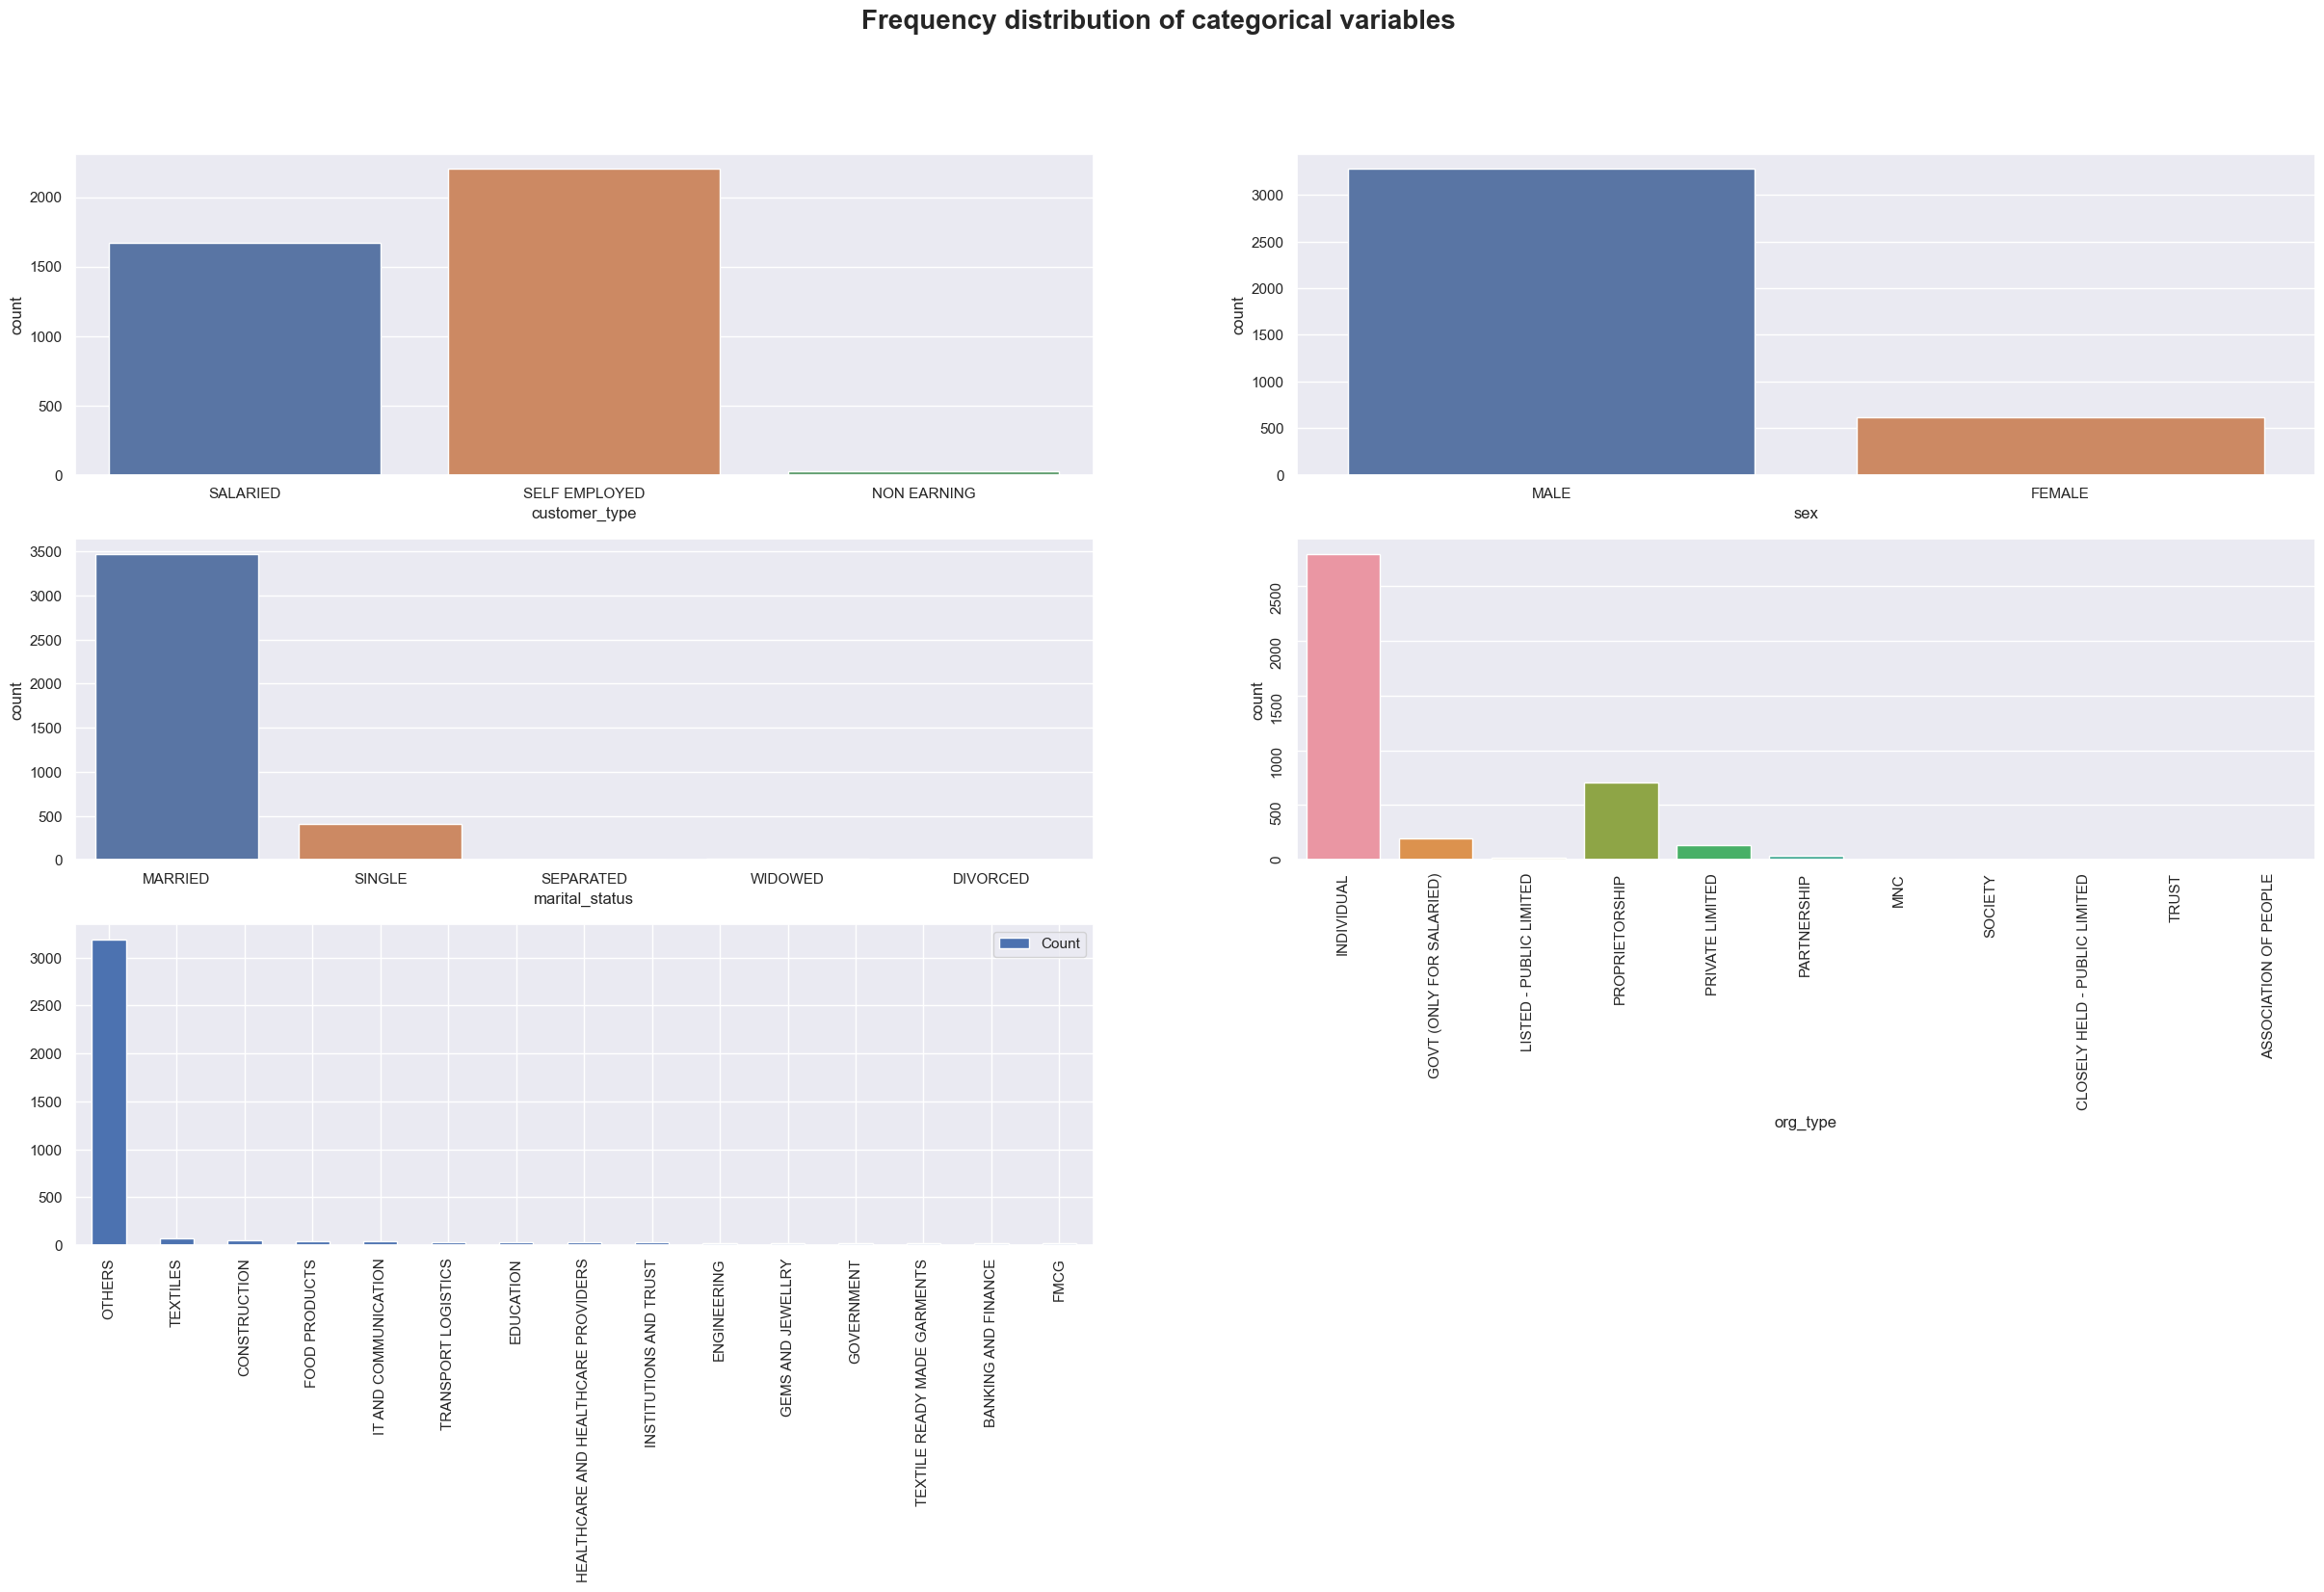

In [10]:
fig,ax = plt.subplots(3,2,figsize=(30,15),dpi=100)
fig.suptitle("Frequency distribution of categorical variables",fontsize=20,fontweight='bold')
sns.countplot(data=df,x="customer_type",ax=ax[0,0])
sns.countplot(data=df,x="sex",ax=ax[0,1])
sns.countplot(data=df,x="marital_status",ax=ax[1,0])
sns.countplot(data=df,x="org_type",ax=ax[1,1])
ax[1,1].tick_params(labelrotation=90)
df.type_of_industry.value_counts().to_frame().rename(columns={"type_of_industry":"Count"}).nlargest(15,"Count").plot(kind='bar',ax=ax[2,0])

ax[2,1].axis('off');

In [11]:
df.select_dtypes("O").nunique()

customer_type        3
sex                  2
type_of_industry    80
marital_status       5
org_type            11
dtype: int64

Bivariate distribution w.r.t. target variable. In similar fashion, even for categorical variables

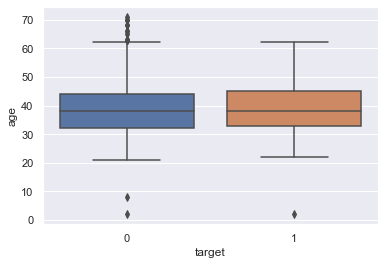

In [12]:
sns.boxplot(data=df,x="target",y="age");

In [13]:
for col in df.select_dtypes("O").columns.tolist():
    print(df.groupby([col])['target'].sum())
    print('\n')

customer_type
NON EARNING        1
SALARIED          63
SELF EMPLOYED    234
Name: target, dtype: int64


sex
FEMALE     39
MALE      257
Name: target, dtype: int64


type_of_industry
AGRICULTURE                         3
AUTO COMPONENTS                     1
AUTOMOTIVE                          1
BANKING AND FINANCE                 1
CEMENT AND CEMENT PRODUCTS          0
                                   ..
TRANSPORT LOGISTICS                 7
TRANSPORT OPERATOR                  0
TRAVEL AGENTS AND TOUR OPERATORS    0
UTILITY SERVICES                    0
WOOD AND WOOD PRODUCTS              1
Name: target, Length: 80, dtype: int64


marital_status
DIVORCED       0
MARRIED      262
SEPARATED      0
SINGLE        34
WIDOWED        0
Name: target, dtype: int64


org_type
ASSOCIATION OF PEOPLE              0
CLOSELY HELD - PUBLIC LIMITED      0
GOVT (ONLY FOR SALARIED)          15
INDIVIDUAL                       181
LISTED - PUBLIC LIMITED            0
MNC                               

In [14]:
#Total number of defaults in last 12 months
df.groupby(['no_def_l12'])['target'].sum()

no_def_l12
0    185
1     42
2     30
3     18
4      5
5      3
6      9
7      6
Name: target, dtype: int64

In [15]:
df[(df['no_def_l12']!=df['no_def_l3'])].groupby(["no_def_l3"])['target'].sum()

no_def_l3
0    41
1     7
2     2
3     0
4     0
5     1
6     0
Name: target, dtype: int64

In [16]:
df.groupby('target')['bank_balance'].mean()

target
0   143734.417
1   139948.456
Name: bank_balance, dtype: float64

Multi-variate distribution w.r.t. target variable

<AxesSubplot:xlabel='sex', ylabel='net_income'>

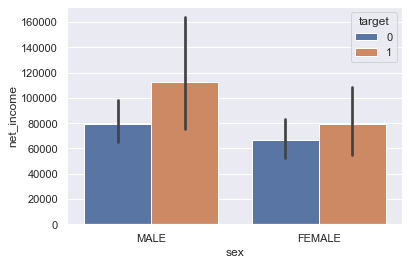

In [17]:
sns.barplot(data=df,x='sex',y='net_income',hue='target')

In [18]:
df.groupby(['sex','target'])['bank_balance'].mean()

sex     target
FEMALE  0        177991.011
        1        676026.536
MALE    0        136612.720
        1         71757.783
Name: bank_balance, dtype: float64

Missing value Treatment :
* Missing at random / not random
* For cases, where missing is due to random factors  --- Missing value treatment

In [19]:
df['bank_balance'] = df.groupby("customer_type")['bank_balance'].transform(lambda x: x.fillna(x.mean()))

In [20]:
print(df.shape)
df.dropna(inplace=True)
df.reset_index(inplace=True , drop=True)
print(df.shape)

(3894, 35)
(3885, 35)


## Variable creation

* conversion of enquiry to account ( Total accounts / Total enquiries )
* ratio of unsecured exporsure ( unsecure outstanding / total outstanding )
* ratio of home loan to all loans
* ratio of last 12 months enquiery to all enquiries 
* age to income ratio
* live vs total loans
* total loans by age
* etc 
 
 create in total, at least 18 additional variables

In [21]:
col = df.describe().columns.to_list()
col.remove("id")
col.remove('target')
df_backup = df.copy()
for i in col:
    for j in col:
        if i != j:
            df_backup[i+"_"+j] = df_backup[i]/df_backup[j]
            
print(df_backup.shape)

(3885, 791)


## Variable Reduction

* Variable importance using Random Forest
* Variable importance using IV
* Correlation
* Variable Cluster

In [22]:
cols = df_backup.columns.tolist()
cols.remove("id")
cols.remove("target")

In [23]:
iv_df  = pd.DataFrame()
iv = {}
norun= []
for i in cols:
    try:
        if df_backup[i].dtype != 'object':
            temp = df_backup[[i,"target"]].assign(bins=pd.qcut(df_backup[i],10,duplicates='drop'))
            tab =  pd.crosstab(index=temp.bins,columns=temp["target"],values=temp.index,aggfunc="count").rename(columns={0:'bad',1:'good'}).assign(badpercent=lambda x : x["bad"]/sum(x["bad"]),
                   goodpercent =lambda x : x["good"]/sum(x["good"]),
                   WoE = lambda x:np.log(x.goodpercent/x.badpercent),

                   IV_values =  lambda x : x.WoE *(x.goodpercent-x.badpercent),
                   IV = lambda x : sum(x.IV_values))
                        
            tab['name'] = i
            iv_df = iv_df.append(tab)
            iv[i] = sum(tab["IV_values"])

        else:
            tab =  pd.crosstab(index=df_backup[i],columns=df_backup["target"],values=df_backup["id"],aggfunc="count").rename(columns={0:'bad',1:'good'}).assign(badpercent=lambda x : x["bad"]/sum(x["bad"]),
            goodpercent =lambda x : x["good"]/sum(x["good"]),
            WoE = lambda x:np.log(x.goodpercent/x.badpercent),
            IV_values =  lambda x : x.WoE *(x.goodpercent-x.badpercent),
            IV = lambda x : sum(x.IV_values))
            iv[i] = sum(tab["IV_values"])
            tab['name'] = i
            iv_df = iv_df.append(tab)
  
            
            
    except:
        norun.append(i)

In [24]:
print(len(norun))
print(df_backup.shape)
df_backup.drop(columns=norun,inplace=True)
print(df_backup.shape)


644
(3885, 791)
(3885, 147)


In [25]:
df_iv  = (pd.DataFrame.from_dict([iv]).T).rename(columns={0:"Information_Value"})
iv_cols = df_iv.sort_values(by="Information_Value",ascending=False)[:13].index.tolist()
df_iv.sort_values(by="Information_Value",ascending=False)[:16]

,Information_Value
no_enq_l12_age,0.315
no_enq_l12,0.313
customer_type,0.267
no_enq_l3,0.263
no_hl_enq_l3_no_enq_l3,0.243
no_enq_l3_age,0.233
no_enq_age,0.227
no_enq,0.226
net_income_age,0.222
net_income,0.208


In [26]:
df_backup.fillna(-1,inplace=True)

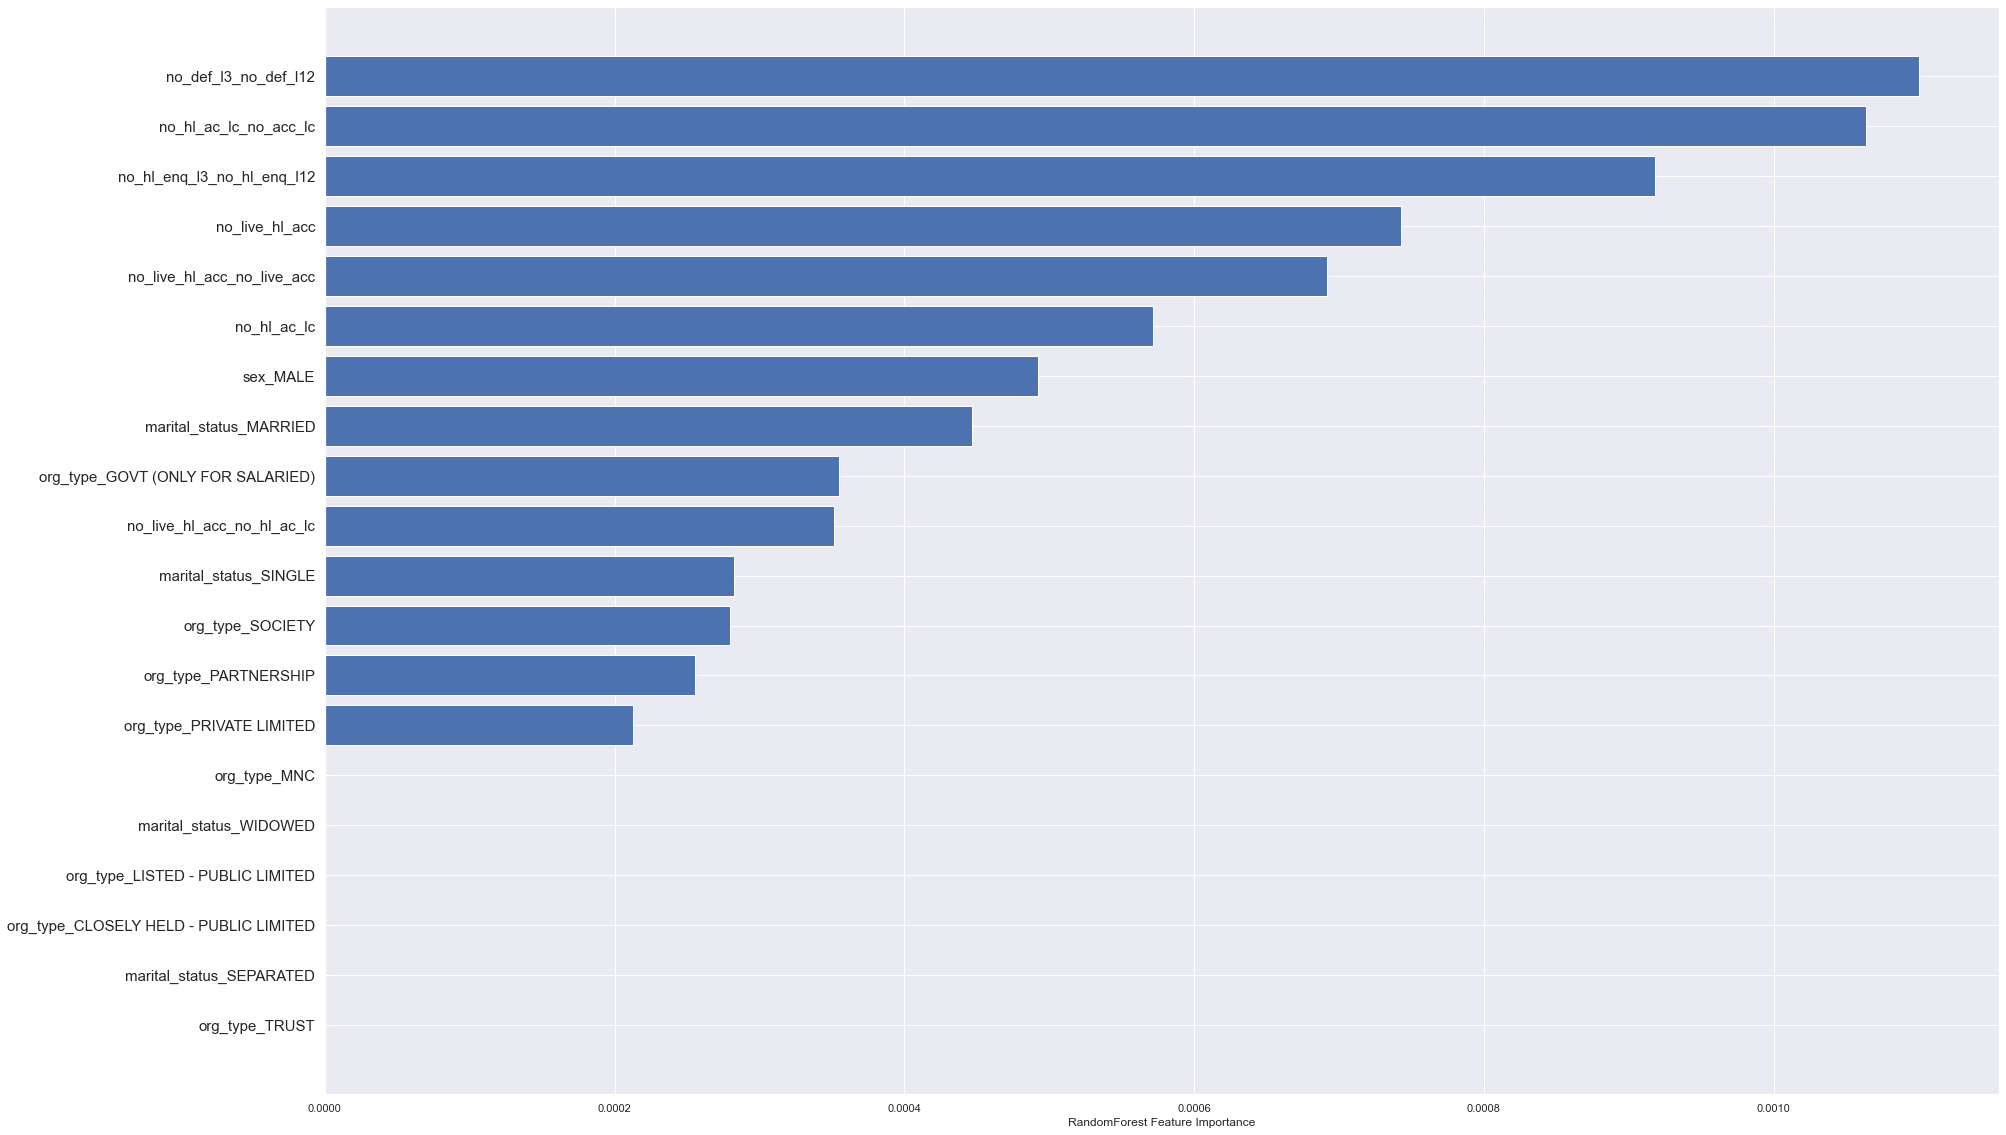

In [27]:
X = df_backup.drop(columns=["type_of_industry","id"])
X = pd.get_dummies(data=X,columns=X.select_dtypes("O").columns.to_list(),drop_first=True)
y = df_backup.loc[:,"target"]
rf = RandomForestClassifier().fit(X,y)
sorted_feature_importance = rf.feature_importances_.argsort()
plt.figure(figsize=(30,20))
plt.barh(X.columns[sorted_feature_importance][:20], 
    rf.feature_importances_[sorted_feature_importance][:20], 
        )
plt.yticks(fontsize=15)
plt.xlabel("RandomForest Feature Importance");

In [28]:
rf_cols = X.columns[sorted_feature_importance][:16].tolist()

In [29]:
## Variable clustering
from varclushi import VarClusHi

x = df_backup.drop(columns=["id","target"])
x = x[x.select_dtypes(["int64",'float64']).columns.to_list()]
varclus_model = VarClusHi(x,maxeigval2=1,maxclus=12)
varclus_model.varclus()

In [30]:
pip install varclushi

Note: you may need to restart the kernel to use updated packages.


In [31]:
varclus_model.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,no_enq_l12,0.533,0.351,0.720
1,0,no_enq,0.664,0.340,0.509
2,0,no_acc_lc,0.615,0.211,0.488
3,0,no_unsc_acc_lc,0.686,0.236,0.411
4,0,no_live_acc,0.711,0.323,0.427
...,...,...,...,...,...
135,11,no_enq_no_acc_lc,0.418,0.076,0.630
136,11,no_hl_enq_no_acc_lc,0.422,0.146,0.677
137,11,no_def_l3_no_acc_lc,0.010,0.327,1.471
138,11,no_def_l12_no_acc_lc,0.013,0.279,1.369


In [32]:
varclus_model.rsquare.sort_values(by="RS_Ratio")

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
100,8,debt_ratio_net_income,0.996,0.002,0.004
97,8,debt_ratio,0.996,0.002,0.004
99,8,debt_ratio_gross_income,0.989,0.002,0.011
98,8,debt_ratio_age,0.970,0.002,0.030
40,3,gross_income,0.892,0.048,0.113
...,...,...,...,...,...
101,8,net_income_no_acc_lc,0.002,0.169,1.201
67,5,gross_income_no_acc_lc,0.003,0.177,1.212
138,11,no_def_l12_no_acc_lc,0.013,0.279,1.369
137,11,no_def_l3_no_acc_lc,0.010,0.327,1.471


In [33]:
varclus_cols = varclus_model.rsquare.sort_values(by="RS_Ratio").Variable.tolist()[:12]

In [34]:
print(iv_cols)

['no_enq_l12_age', 'no_enq_l12', 'customer_type', 'no_enq_l3', 'no_hl_enq_l3_no_enq_l3', 'no_enq_l3_age', 'no_enq_age', 'no_enq', 'net_income_age', 'net_income', 'net_income_days_last_acc_open', 'no_enq_l12_days_last_acc_open', 'gross_income_days_last_acc_open']


In [35]:
print(rf_cols)

['org_type_TRUST', 'marital_status_SEPARATED', 'org_type_CLOSELY HELD - PUBLIC LIMITED', 'org_type_LISTED - PUBLIC LIMITED', 'marital_status_WIDOWED', 'org_type_MNC', 'org_type_PRIVATE LIMITED', 'org_type_PARTNERSHIP', 'org_type_SOCIETY', 'marital_status_SINGLE', 'no_live_hl_acc_no_hl_ac_lc', 'org_type_GOVT (ONLY FOR SALARIED)', 'marital_status_MARRIED', 'sex_MALE', 'no_hl_ac_lc', 'no_live_hl_acc_no_live_acc']


In [36]:
num_cols = df_backup.select_dtypes("number").columns.tolist()

In [37]:
final_cols = [col for col in num_cols if (col in iv_cols) or (col in rf_cols) or (col in varclus_cols)] 
cat_cols = ['org_type','marital_status','sex',"target","id"]
final_cols.extend(cat_cols)

In [38]:
df_n = df_backup.loc[:,final_cols]

<AxesSubplot:>

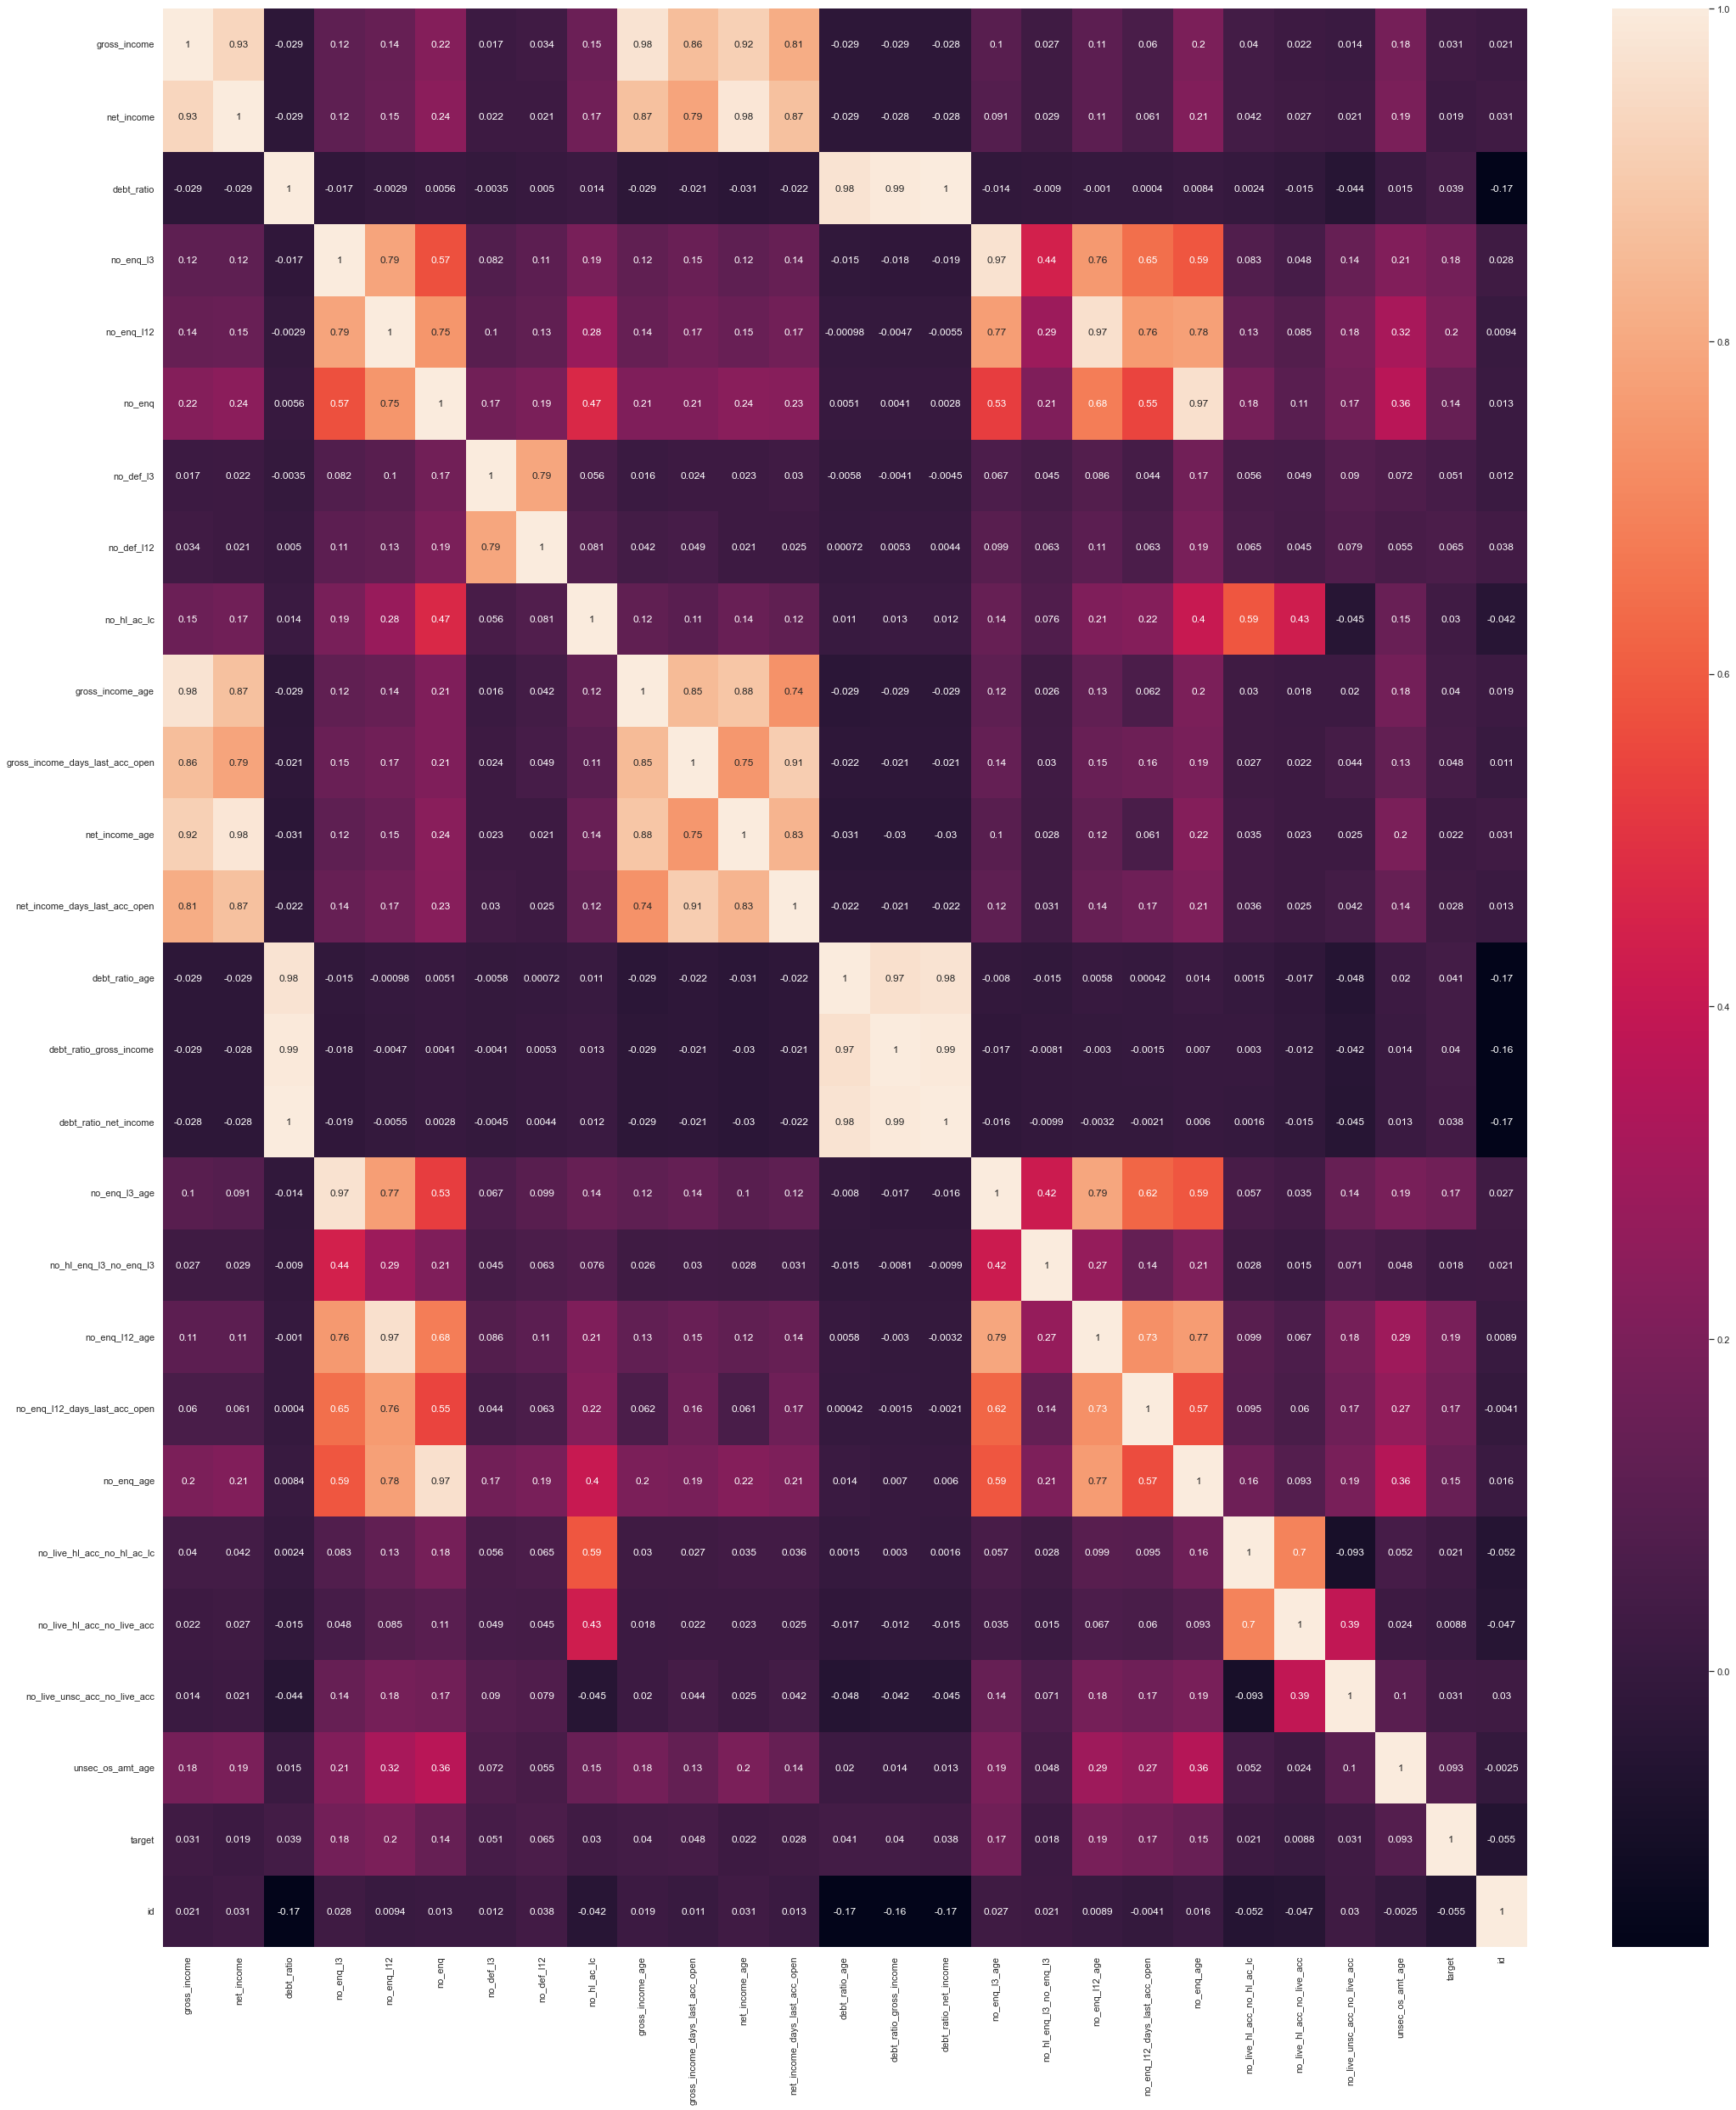

In [39]:
plt.figure(figsize=(36,42))
sns.heatmap(df_n.corr(),annot=True)

In [40]:
df_n.isna().sum()

gross_income                       0
net_income                         0
debt_ratio                         0
no_enq_l3                          0
no_enq_l12                         0
no_enq                             0
no_def_l3                          0
no_def_l12                         0
no_hl_ac_lc                        0
gross_income_age                   0
gross_income_days_last_acc_open    0
net_income_age                     0
net_income_days_last_acc_open      0
debt_ratio_age                     0
debt_ratio_gross_income            0
debt_ratio_net_income              0
no_enq_l3_age                      0
no_hl_enq_l3_no_enq_l3             0
no_enq_l12_age                     0
no_enq_l12_days_last_acc_open      0
no_enq_age                         0
no_live_hl_acc_no_hl_ac_lc         0
no_live_hl_acc_no_live_acc         0
no_live_unsc_acc_no_live_acc       0
unsec_os_amt_age                   0
org_type                           0
marital_status                     0
s

In [41]:
new = df_n.select_dtypes("float64")
new = add_constant(new,prepend=True)

In [42]:
vif = pd.Series([variance_inflation_factor(new, i) 
               for i in range(new.shape[1])], 
              index=new.columns)[1:]
vif

gross_income                       317.894
net_income                         323.034
debt_ratio                        1288.451
gross_income_age                   403.311
gross_income_days_last_acc_open     87.155
net_income_age                     351.061
net_income_days_last_acc_open       76.196
debt_ratio_age                      20.901
debt_ratio_gross_income             83.992
debt_ratio_net_income             1358.531
no_enq_l3_age                        3.191
no_hl_enq_l3_no_enq_l3               1.266
no_enq_l12_age                       5.149
no_enq_l12_days_last_acc_open        2.426
no_enq_age                           2.730
no_live_hl_acc_no_hl_ac_lc           3.030
no_live_hl_acc_no_live_acc           3.406
no_live_unsc_acc_no_live_acc         1.868
unsec_os_amt_age                     1.200
dtype: float64

In [43]:
drop_cols = vif[vif>10].index.tolist()

In [44]:
print(df_n.shape)
df_n.drop(columns=drop_cols,inplace=True)
print(df_n.shape)

(3885, 30)
(3885, 20)


## Data Split ( Dev : OOS , 70 : 30)

In [45]:
from sklearn.model_selection import train_test_split
X = df_n.drop('target',axis=1)
y= df_n.loc[:,"target"]
c= X.select_dtypes("O").columns.tolist()
X = pd.get_dummies(data=X,drop_first=True,columns=c)
X_tr,X_test,y_tr,y_test = train_test_split(X,y,test_size=0.3)

## Coarse Classing / Binning - (Optional)

To be done, only on the development data
* Decision Trees (or) IV/WOE



#### If you are opting for IV/WOE
* Run a loop similar to IV
* Calculate Bad-Rate ( i.e. bad/total for each decile )
* study the bad rate 
* Check whether a logical trend can be identified 
* If no - Delete the variable
* If yes - Identify appropriate cut-off

#### If you are opting for Decision Trees
* Create Decision Stumps for each variable 
* Check whether a logical trend can be identified 
* If no - Delete the variable
* If yes - perhaps you can consider sharping the buckets, may or may not be required


In [46]:
# for reference purpose ( please note - No data processing or segmentation was performed , just a referral )

#df['ENQ_5_bkt'] = pd.qcut( df['ENQ_5'] , 10, duplicates = 'drop')
#t = df.pivot_table( index = 'ENQ_5_bkt' , values = 'ID', columns = 'Target' , aggfunc = 'count', margins = True)
#t['bad_rate'] = t[1]/ t['All']*100
#t['IV'] = (t['good_dist'] - t['bad_dist']) * np.log(t['good_dist']/t['bad_dist']) 
#t

## Check the trend on validation sample

After step 6, you will have only categorical variables in your model.
All the numeric variables ( which were following a logical trend ) you must have binned them

Check,
Whether those same bins, continue to show similar trend even on validation sample. If the same trend in OOS then keep else delete the variable

## Final check before modelling

* No duplicates at row level ( dev + oos )
* No multi-collineraity 
* No numeric variables ( get_dummies , onehotcoding etc )
* No too many variables ( at max 20 )

In [47]:
new = X.select_dtypes("float64")
new = add_constant(new,prepend=True)
vif_n = pd.Series([variance_inflation_factor(new, i) 
               for i in range(new.shape[1])], 
              index=new.columns)[1:]
vif_n

no_enq_l3_age                   3.160
no_hl_enq_l3_no_enq_l3          1.259
no_enq_l12_age                  5.114
no_enq_l12_days_last_acc_open   2.252
no_enq_age                      2.637
no_live_hl_acc_no_hl_ac_lc      3.021
no_live_hl_acc_no_live_acc      3.397
no_live_unsc_acc_no_live_acc    1.857
unsec_os_amt_age                1.161
dtype: float64

In [48]:
X.head()

,no_enq_l3,no_enq_l12,no_enq,no_def_l3,no_def_l12,no_hl_ac_lc,no_enq_l3_age,no_hl_enq_l3_no_enq_l3,no_enq_l12_age,no_enq_l12_days_last_acc_open,...,org_type_PARTNERSHIP,org_type_PRIVATE LIMITED,org_type_PROPRIETORSHIP,org_type_SOCIETY,org_type_TRUST,marital_status_MARRIED,marital_status_SEPARATED,marital_status_SINGLE,marital_status_WIDOWED,sex_MALE
0,0,1,14,0,0,0,0.000,-1.000,0.025,0.001,...,0,0,0,0,0,1,0,0,0,1
1,0,0,11,5,5,0,0.000,-1.000,0.000,0.000,...,0,0,0,0,0,1,0,0,0,1
2,0,0,3,0,0,2,0.000,-1.000,0.000,0.000,...,0,0,0,0,0,1,0,0,0,1
3,2,3,3,0,0,1,0.041,1.000,0.061,0.001,...,0,0,0,0,0,1,0,0,0,0
4,1,1,2,5,5,0,0.022,0.000,0.022,0.000,...,0,0,0,0,0,1,0,0,0,1


## Logistic Regression

In [49]:
lgb = LogisticRegression().fit(X_tr,y_tr)
lgb_dev_pr = lgb.predict_proba(X_tr)[:,1]

roc_auc_score(y_tr,lgb.predict_proba(X_tr)[:,1])

0.6630959341987293

###  Using Lasso regression for dimesionality reduction ( Optional ) - only for learning purpose if interested

## Lift table

* Replicate the model from step 9, even on validation sample
* Get the probability of Default 
* Bucket the probablity of Default in to 10 deciles
* Create a Lift table for both ( dev + oos )

In [50]:
dev = pd.DataFrame({"no_enq_l3_age":X_tr["no_enq_l3_age"],"unsec_os_amt_age":X_tr['unsec_os_amt_age'],'predicted_prob_dev':lgb_dev_pr,'target':y_tr})
oos = pd.DataFrame({"no_enq_l3_age":X_test["no_enq_l3_age"],"unsec_os_amt_age":X_test['unsec_os_amt_age'],'predicted_prob_oos':lgb.predict_proba(X_test)[:,1],'target':y_test})

In [51]:
roc_auc_score(y_test,lgb.predict_proba(X_test)[:,1])

0.6505494505494505

In [52]:
dev["bins"] = pd.qcut(dev["predicted_prob_dev"],10,duplicates='drop')
dev

,no_enq_l3_age,unsec_os_amt_age,predicted_prob_dev,target,bins
646,0.021,0.000,0.060,1,"(0.0534, 0.0618]"
3020,0.043,169.174,0.099,0,"(0.0855, 0.104]"
3297,0.000,0.000,0.082,0,"(0.0718, 0.0855]"
1947,0.045,7725.932,0.067,0,"(0.0618, 0.0718]"
1551,0.000,0.000,0.021,0,"(-0.000658, 0.031]"
...,...,...,...,...,...
2680,0.087,0.000,0.130,0,"(0.104, 0.137]"
2181,0.143,946.286,0.132,0,"(0.104, 0.137]"
3746,0.042,0.000,0.074,0,"(0.0718, 0.0855]"
1745,0.000,0.000,0.051,0,"(0.0463, 0.0534]"


In [53]:
oos["bins"] = pd.qcut(oos["predicted_prob_oos"],10,duplicates='drop')
oos

,no_enq_l3_age,unsec_os_amt_age,predicted_prob_oos,target,bins
1693,0.146,0.000,0.246,0,"(0.139, 0.93]"
1009,0.031,1739.125,0.056,0,"(0.0526, 0.0619]"
2286,0.067,0.000,0.117,0,"(0.104, 0.139]"
2878,0.050,3998.750,0.301,0,"(0.139, 0.93]"
1564,0.036,344.357,0.091,0,"(0.0854, 0.104]"
...,...,...,...,...,...
142,0.026,0.000,0.110,0,"(0.104, 0.139]"
3459,0.000,0.000,0.159,0,"(0.139, 0.93]"
2906,0.033,160.817,0.060,0,"(0.0526, 0.0619]"
222,0.360,35540.640,0.158,1,"(0.139, 0.93]"


In [54]:
t = pd.pivot_table(index="bins",values='unsec_os_amt_age',columns='target',data=oos,aggfunc="count",margins=True,margins_name="Total").rename(columns={0:"Good",1:"Bad"})
t

target,Good,Bad,Total
bins,,,
"(-0.0006330000000000001, 0.0301]",116,1,117
"(0.0301, 0.0375]",107,10,117
"(0.0375, 0.0454]",112,4,116
"(0.0454, 0.0526]",107,10,117
"(0.0526, 0.0619]",111,5,116
"(0.0619, 0.0715]",111,6,117
"(0.0715, 0.0854]",109,7,116
"(0.0854, 0.104]",104,13,117
"(0.104, 0.139]",99,17,116


In [55]:
#t.to_excel("oos_lift_unsec_os_amt_age.xlsx")

## DEV
![lift_table_development_image](dev.png)


## OOS
![lift_table_oos_image](oos.png)
